In [1]:
from IPython.display import display, Image

url_imagen = 'https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-2linies.png'
display(Image(url=url_imagen))

Fonaments de programació
============================

---

Tutorial de creació d'expressions *xpath*
-----------------------------------------------------

---

In [ ]:
# Muntem la unitat Drive per accedir als fitxers de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especifiquem la ruta fins a la carpeta on tenim els fitxers de la Unitat 5
%cd /content/drive/MyDrive/Colab_Notebooks/prog_datasci_5

# Carreguem la llibreria per mostrar les imatges
from IPython import display

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/prog_datasci_5


# Pàgines web i HTML

En aquest tutorial veurem els conceptes bàsics de pàgines web que ens ajudaran a desenvolupar *crawlers* amb scrapy, en especial, a desenvolupar el *parser*, que és la part del *crawler* que selecciona, de cada pàgina, quines dades ens interessa guardar.

L'esquelet d'una pàgina web està escrit en HTML (*Hypertext Markup Language*), un llenguatge de marques que permet construir documents estructurats mitjanant la definició de diversos elements.
Els elements estan delimitats per *tags* (`<tag_name>`) i cada *tag* té una funcionalitat o propòsit associat.
Per exemple, `<header>` s'utilitza per definir l'encapçalament de la pàgina, mentre que `<body>` s'utilitza per definir-ne el cos principal.
Existeixen diversos *tags* amb funcionalitat diversa: `<a>`, `<img>`, `<p>`, ... D'altra banda, els *tags* poden tenir propietats associades, com pot ser el seu identificador (`id`) o la seva classe (`class`).

En primer lloc, començarem per veure quina és la correspondència entre els elements que podem veure a una pàgina i el seu codi HTML. Per a això, farem ús de les eines de desenvolupador del navegador.
En segon lloc, un cop identificat el codi HTML que ens interessa, veurem com podem derivar expressions **xpath** per seleccionar-lo, a més de com podem refinar aquestes expressions i provar-les.

# Eines de desenvolupador al navegador

La majoria de navegadors moderns, sinó tots, venen amb eines de desenvolupador que ens permeten, entre d'altres coses, inspeccionar el codi HTML de les pàgines que visitem.

Nosaltres utilitzarem Mozilla Firefox, ja que el tenim disponible a la màquina virtual, però resultats similars es poden aconseguir amb altres navegadors.

## Inspeccionar codi

Per tal d'inspeccionar codi farem clic dret sobre la pàgina que volem inspeccionar i seleccionarem **Inspect Element** (o polsarem Q).

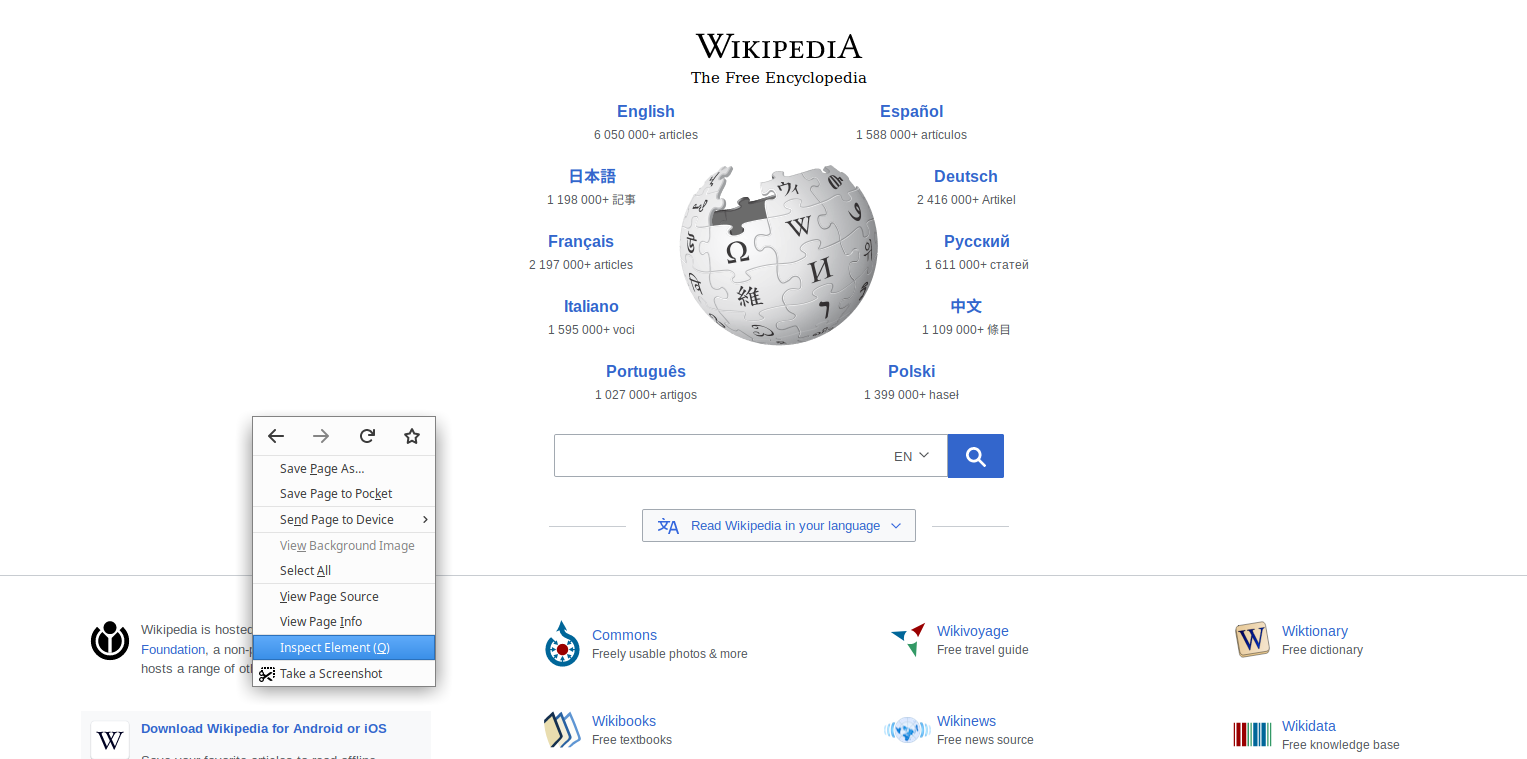

In [ ]:
display.Image("img/img1.png")

Amb això se'ns desplegara una nova secció amb diferents eines. La que ens interessa a nosaltres és la de la pestanya **Inspector** (primera de l'esquerra).

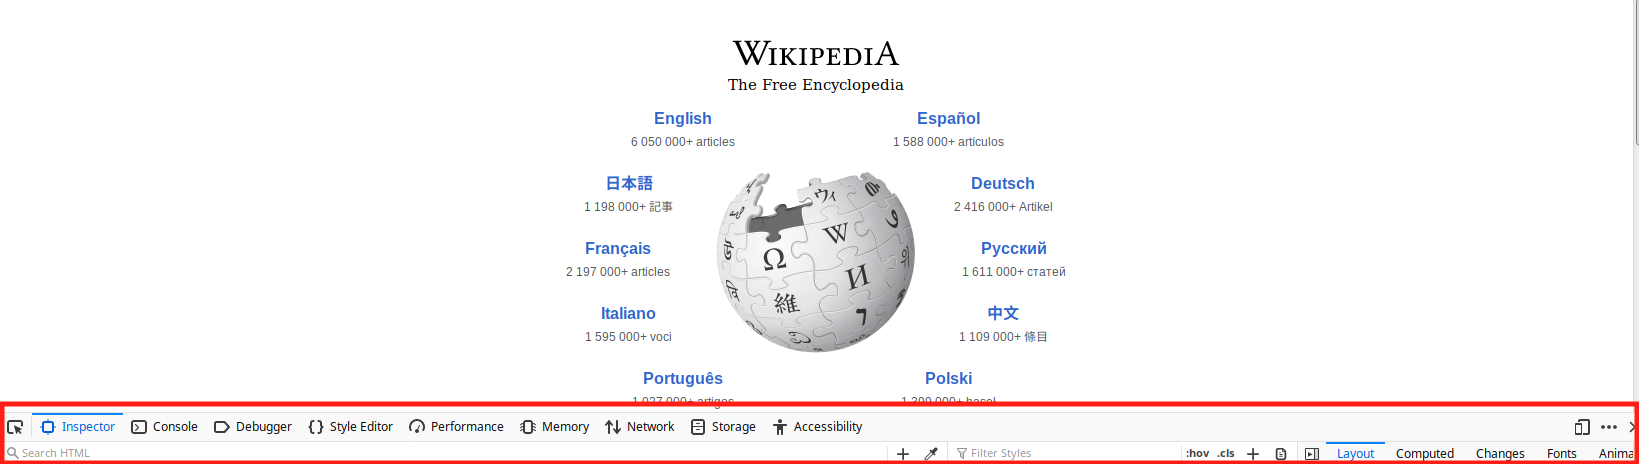

In [ ]:
display.Image("img/img2.png")

Amb l'inspector obert, podrem veure que al requadre inferior esquerre ens ha aparegut el codi HTML de la pàgina, i que hi podem interactuar (moure'ns pel codi, obrir i tancar *tags*, i fins i tot modificar parts del codi). A més a més, **podem seleccionar seccions de la web per veure a quina part del codi corresponen**. Per fer-ho clicarem sobre el selector d'elements (icona del quadre amb una fletxa, o prement CTRL+SHIFT+C) i seleccionarem l'element que ens interessi:

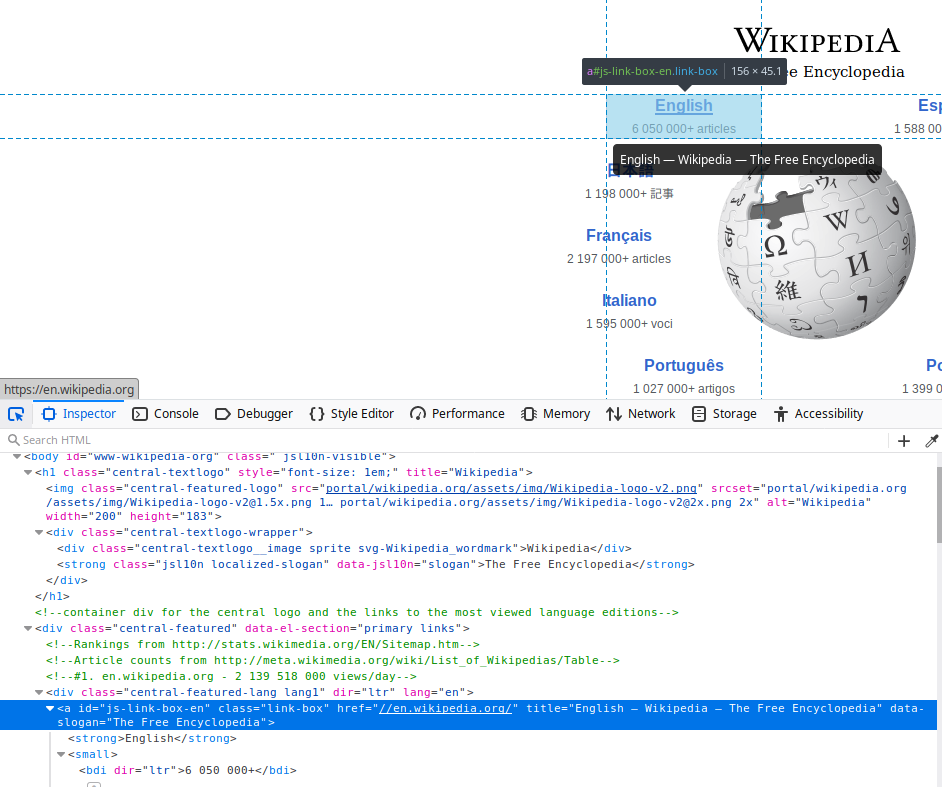

In [ ]:
display.Image("img/img3.png")

Veurem que una part del codi se'ns ha seleccionat. Aquesta és la part corresponent a la secció que hem clicat. Podem veure, per exemple, quin és **l’id** de l'element seleccionat, és a dir, el camp que identifica a aquest element dins de la web. També podem veure dins de quins *tags* es troba aquest element. En el nostre cas:

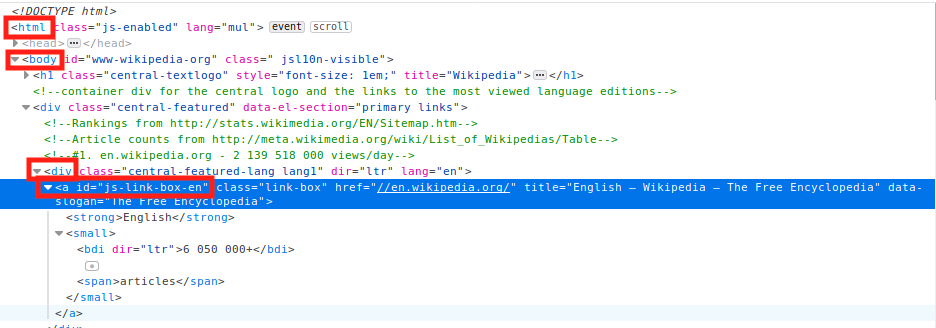

In [ ]:
display.Image("img/img4.png")

A més a més, podem veure que aquest *tag* és `<a>`, que s'utilitza per crear enllaços a altres adreces web. En aquest cas, el *link* ens porta a la pàgina de Wikipedia en anglès: el *link* associat al *tag* és **//en.wikipedia.org/**.

Finalment, podem veure que la classe a que pertany aquest element és **link-box** (camp *class*).

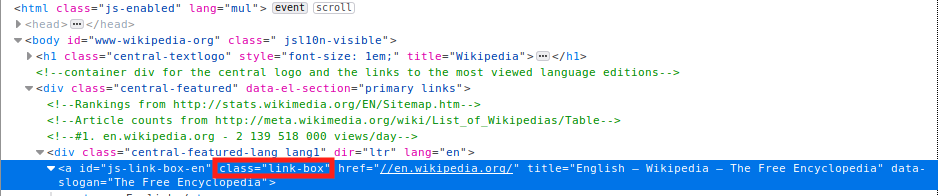

In [ ]:
display.Image("img/img5.png")

# Scrapy shell

Obtenir l'*xpath* per uns elements en concret, a la primera, pot ser complicat. Per tal de poder provar les nostres expressions fins trobar la que millor s'adapta a les nostres necessitats podem utilitzar la *scrapy shell*. Per obtenir la informació d'una pàgina web amb *scrapy shell* haurem d'executar `scrapy shell <URL>`, en el nostre cas:

```
scrapy shell wikipedia.org
```

Al obrir la *shell*, scrappy ha creat automàticament alguns objectes sobre la pàgina descarregada. Entre aquests es troba l'objecte `response`, que conté el *parsing* de la pàgina, i que és el que farem servir per testejar les expressions *xpath*.

A continuació veurem com utilitzar *scrapy shell* per obtenir la mateixa informació que hem obtingut amb les eines de desenvolupador del navegador.

Començarem, però, per un exercici més senzill per acostumar-nos a la sintaxis.

Imaginem que volem obtenir el títol de la pàgina de Wikipedia, és a dir, el nom que veiem a la pestanya quan obrim una pàgina web.

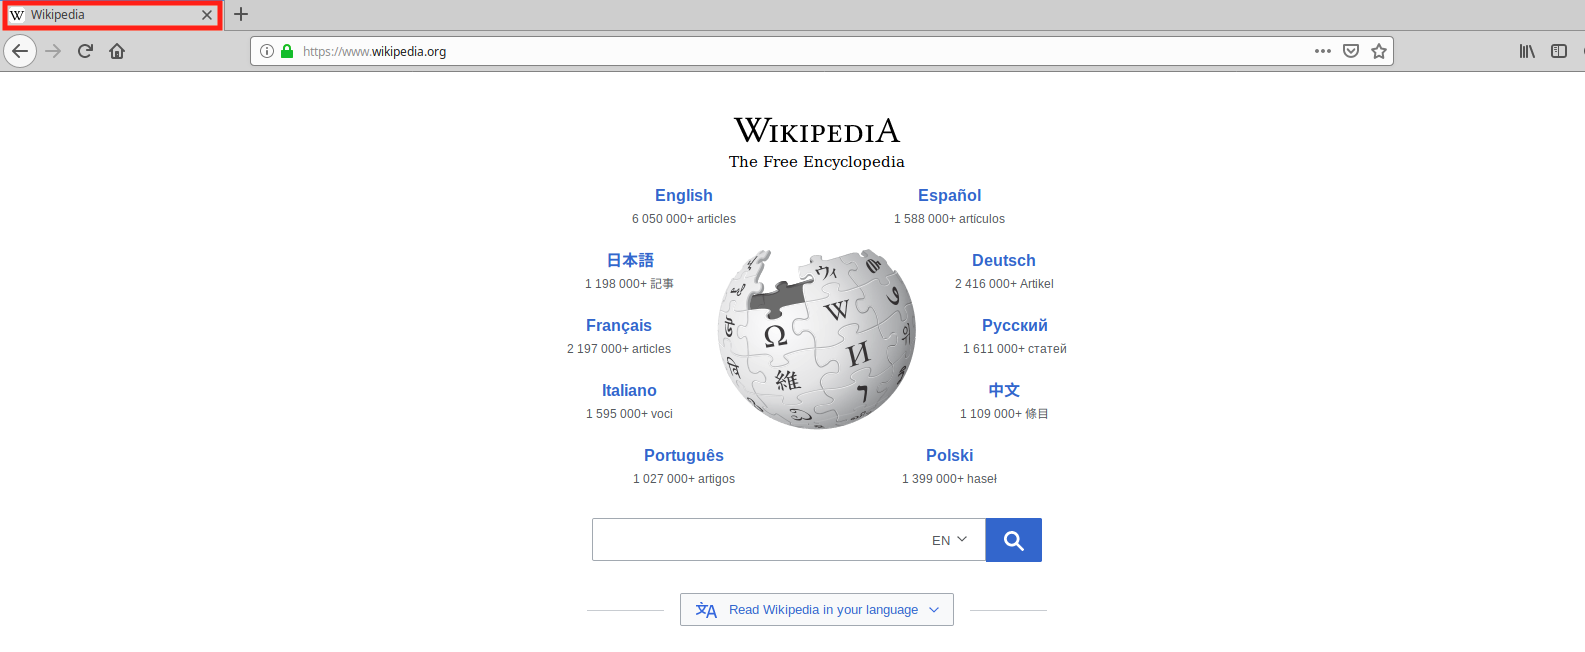

In [ ]:
display.Image("img/img6.png")

Aquesta informació es troba, sempre, al *tag title* de l'encapçalament (*tag head*) d'una web. Per obtenir la informació crearem un *xpath* a partir de la resposta que ens ha tornat *scrapy shell* (objecte `response`):

```
In [1]: response.xpath('/html/head/title')
Out[1]: [<Selector xpath='/html/head/title' data='<title>Wikipedia</title>'>]
```

Com podeu veure, s'especifiquen els *tags* com si fossin directoris (separats per `/`). En el nostre cas estàvem buscant `/html/head/title`.

Si volguéssim aconseguir tots els *tags title* dins de la pàgina, podríem fer-ho amb:

```
In [2]: response.xpath('//title')
Out[2]: [<Selector xpath='//title' data=‘<title>Wikipedia</title>'>]

```

El resultat és exactament el mateix, ja que només hi hauria d'haver un títol per pàgina.

El mateix aplicará per qualsevol *tag*, `response.xpath(‘//<tag_name>’)` ens retornarà tots els *tags* de tipus `<tag_name>` que contingui la pàgina.

Anem ara a obtenir tots els *links* a apartats de Wikipedia en diferents idiomes basant-nos en el que hem vist anteriorment amb les eines de desenvolupador. Podem començar per obtenir el *tag* al *link* en anglès, com havíem fet anteriorment, i continuar des d’aquí.

Per fer-ho, podeu basar el vostre *xpath* en el *path* que hem creat amb les eines de desenvolupador. Fixeu-vos que per fer referència a una propietat (*id*, *class*, …) haurem d’utilitzar `@` i posar el valor entre cometes (`@class=“myClass”`).

```
In [3]: response.xpath('/html/body/div[@class="central-featured"]/div[@class="central-featured-lang lang1"]/a[@id="js-link-box-en"]')
Out[3]: [<Selector xpath='/html/body/div[@class="central-featured"]/div[@class="central-featured-lang lang1"]/a[@id="js-link-box-en"]' data='<a id="js-link-box-en" href="//en.wikipe'>]
```

Si volguéssim obtenir el contingut d’aquest *tag* per tal de veure la propietat *href* (que conté el *link* que buscàvem), podríem afegir `@href` al final del nostre *xpath*:

```
response.xpath('/html/body/div[@class="central-featured"]/div[@class="central-featured-lang lang1”]/a[@id=“js-link-box-en”]/@href’)
```

Finalment, si volem obtenir els diferents *links* a apartats de Wikipedia mostrats a la pàgina actual, podem aprofitar-nos del fet que aquests comparteixen la mateixa classe, com hem pogut veure anteriorment:

```
In [5]: response.xpath('//a[@class="link-box"]')
Out[5]:
[<Selector xpath='//a[@class="link-box"]' data='<a id="js-link-box-en" href="//en.wikipe'>,
 <Selector xpath='//a[@class="link-box"]' data='<a id="js-link-box-es" href="//es.wikipe'>,
 <Selector xpath='//a[@class="link-box"]' data='<a id="js-link-box-ja" href="//ja.wikipe'>,
 <Selector xpath='//a[@class="link-box"]' data='<a id="js-link-box-de" href="//de.wikipe'>,
 <Selector xpath='//a[@class="link-box"]' data='<a id="js-link-box-fr" href="//fr.wikipe'>,
 <Selector xpath='//a[@class="link-box"]' data='<a id="js-link-box-ru" href="//ru.wikipe'>,
 <Selector xpath='//a[@class="link-box"]' data='<a id="js-link-box-it" href="//it.wikipe'>,
 <Selector xpath='//a[@class="link-box"]' data='<a id="js-link-box-zh" href="//zh.wikipe'>,
 <Selector xpath='//a[@class="link-box"]' data='<a id="js-link-box-pt" href="//pt.wikipe'>,
 <Selector xpath='//a[@class="link-box"]' data='<a id="js-link-box-pl" href="//pl.wikipe'>]

```

Si no coneixéssim exactament quin és el contingut de la propietat que estem buscant, però en coneixéssim una subcadena (com en el cas de `central-featured-lang lang1`), podríem utilitzar el mètode `contains`:

```
In [6]: response.xpath('//div[contains(@class, "central-featured-lang")]')
Out[6]:
[<Selector xpath='//div[contains(@class, "central-featured-lang")]' data='<div class="central-featured-lang lang1"'>,
 <Selector xpath='//div[contains(@class, "central-featured-lang")]' data='<div class="central-featured-lang lang2"'>,
 <Selector xpath='//div[contains(@class, "central-featured-lang")]' data='<div class="central-featured-lang lang3"'>,
 <Selector xpath='//div[contains(@class, "central-featured-lang")]' data='<div class="central-featured-lang lang4"'>,
 <Selector xpath='//div[contains(@class, "central-featured-lang")]' data='<div class="central-featured-lang lang5"'>,
 <Selector xpath='//div[contains(@class, "central-featured-lang")]' data='<div class="central-featured-lang lang6"'>,
 <Selector xpath='//div[contains(@class, "central-featured-lang")]' data='<div class="central-featured-lang lang7"'>,
 <Selector xpath='//div[contains(@class, "central-featured-lang")]' data='<div class="central-featured-lang lang8"'>,
 <Selector xpath='//div[contains(@class, "central-featured-lang")]' data='<div class="central-featured-lang lang9"'>,
 <Selector xpath='//div[contains(@class, "central-featured-lang")]' data='<div class="central-featured-lang lang10'>]
```

